### Thesis - Comparative Analysis of Energy Consumption using timeseries forecasting and tensorflow

###### The dataset is london kaggle dataset.  


In this dataset, you will find a refactorised version of the data from the London data store, that contains the energy consumption readings for a sample of 5,567 London Households that took part in the UK Power Networks led Low Carbon London project between November 2011 and February 2014. The data from the smart meters seems associated only to the electrical consumption.



#### Time series is a collection of data points that are collected at constant time intervals. It is a dynamic or time dependent problem with or without increasing or decreasing trend, seasonality. Time series modeling is a powerful method to describe and extract information from time-based data and help to make informed decisions about future outcomes.

#### This notebook explores how to retrieve csv times series dataset, visualizing time series dataset, how to transform dataset into times series, testing if the time series is stationary or not using graphical and Dickey-Fuller test statistic methods, how to transform time series to stationary, how to find optimal parameters to build Autoregressive Integrated Moving Average (ARIMA) model using grid search method, diagnosing time series prediction, validating the predictive power, forecasting on a daily level. 




### Data Cleaning 

We removed all the NA values. We had 111 csv files (block0 to block111). We merged these files into one csv sorted in asc(date). The file size combined is 7.36 gb. After cleaning the dataset was reduced to 6.4 gb. 

The dataset was then broken into test and train using Alteryx. I first used python or R but the dataframe was taking more than 5.5gb in memory and causing it to crash again and again. 

The training dataset is from Nov 2011 to Dec 2013. The last 2 months from Jan to Feb 2014 were taken as testing dataset.


Due to memory issues, I filtered the dataset for a single MACID - MAC000002. 
Training dataset from Oct 2012 to Dec 2013 
Testing  dataset from Jan to Feb 2014. 



## Data Loading 

In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import os



#data_path = '../prepared_data/london_smart_meter/'
#data_path = "https://raw.githubusercontent.com/Zorpion/Thesis/master/"
#file = 'trainmac002.csv'
#params = {'column_sort': 'timestamp'}

#train = load_series(data_path, file, params)
#Importing data
train = pd.read_csv('https://raw.githubusercontent.com/Zorpion/Thesis/master/trainmac002.csv', delimiter=',')
##train = https://raw.githubusercontent.com/Zorpion/Thesis/master/trainmac002d.csv
test  = pd.read_csv('https://raw.githubusercontent.com/Zorpion/Thesis/master/testmac002.csv',  delimiter=',')
#Printing head
train.head()

,LCLID,timestamp,year,energy
0,MAC000002,10/12/2012 12:30:00 AM,2012,0.0
1,MAC000002,10/12/2012 1:00:00 AM,2012,0.0
2,MAC000002,10/12/2012 1:30:00 AM,2012,0.0
3,MAC000002,10/12/2012 2:00:00 AM,2012,0.0
4,MAC000002,10/12/2012 2:30:00 AM,2012,0.0


In [9]:
train.head()

,LCLID,timestamp,year,energy
0,MAC000002,10/12/2012 12:30:00 AM,2012,0.0
1,MAC000002,10/12/2012 1:00:00 AM,2012,0.0
2,MAC000002,10/12/2012 1:30:00 AM,2012,0.0
3,MAC000002,10/12/2012 2:00:00 AM,2012,0.0
4,MAC000002,10/12/2012 2:30:00 AM,2012,0.0


In [10]:
train.tail()

,LCLID,timestamp,year,energy
21351,MAC000002,12/31/2013 9:30:00 PM,2013,0.451
21352,MAC000002,12/31/2013 10:00:00 PM,2013,0.456
21353,MAC000002,12/31/2013 10:30:00 PM,2013,0.402
21354,MAC000002,12/31/2013 11:00:00 PM,2013,0.491
21355,MAC000002,12/31/2013 11:30:00 PM,2013,0.452


In [11]:
test.head()

,LCLID,timestamp,year,energy
0,MAC000002,1/1/2014 12:00:00 AM,2014,0.496
1,MAC000002,1/1/2014 12:30:00 AM,2014,0.427
2,MAC000002,1/1/2014 1:00:00 AM,2014,0.469
3,MAC000002,1/1/2014 1:30:00 AM,2014,0.362
4,MAC000002,1/1/2014 2:00:00 AM,2014,0.452


In [12]:
train.timestamp = pd.to_datetime(train.timestamp) 
test.timestamp = pd.to_datetime(test.timestamp) 

In [13]:
train.head()

,LCLID,timestamp,year,energy
0,MAC000002,2012-10-12 00:30:00,2012,0.0
1,MAC000002,2012-10-12 01:00:00,2012,0.0
2,MAC000002,2012-10-12 01:30:00,2012,0.0
3,MAC000002,2012-10-12 02:00:00,2012,0.0
4,MAC000002,2012-10-12 02:30:00,2012,0.0


In [14]:
test.head()

,LCLID,timestamp,year,energy
0,MAC000002,2014-01-01 00:00:00,2014,0.496
1,MAC000002,2014-01-01 00:30:00,2014,0.427
2,MAC000002,2014-01-01 01:00:00,2014,0.469
3,MAC000002,2014-01-01 01:30:00,2014,0.362
4,MAC000002,2014-01-01 02:00:00,2014,0.452


## Using pandas so converting timestamp to index. 

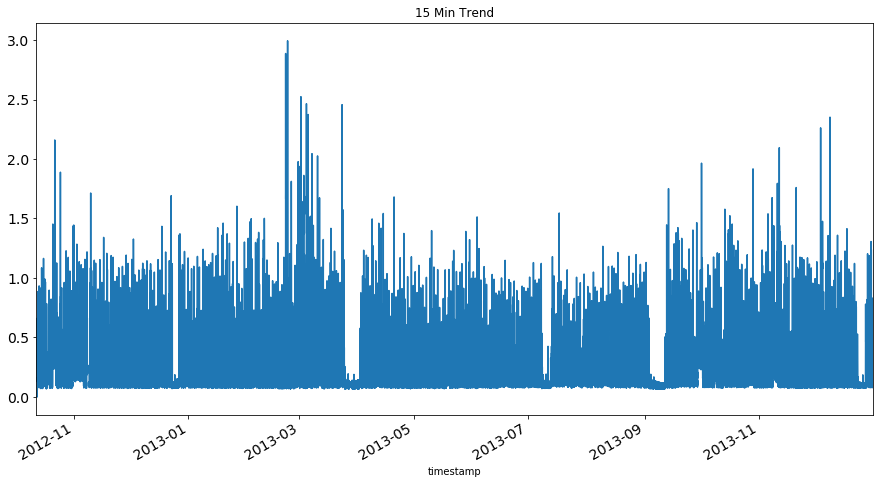

In [15]:
train.index = train.timestamp 
train.energy.plot(figsize=(15,8), title= '15 Min Trend', fontsize=14)
plt.show()

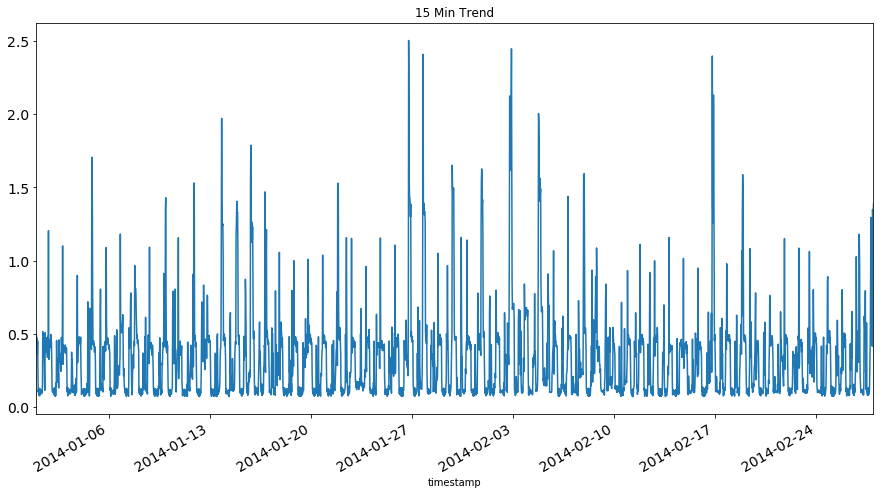

In [16]:
test.index = test.timestamp 
test.energy.plot(figsize=(15,8), title= '15 Min Trend', fontsize=14)
plt.show()

In [ ]:
import plotly
plotly.tools.set_credentials_file(username='DemoAccount', api_key='lr1c37zw81')

In [18]:
import matplotlib.pyplot as plt
import numpy as np

boxplot_train = train['energy'] 
plt.figure()
plt.boxplot(boxplot_train, 0, '')

#boxplot_test = test['energy'] 
#plt.figure()
#plt.boxplot(boxplot_test, 0, '')

{'boxes': [<matplotlib.lines.Line2D at 0x27d9efedac8>],
 'caps': [<matplotlib.lines.Line2D at 0x27d9efe4e10>,
 'fliers': [],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x27d9ed72e80>],
 'whiskers': [<matplotlib.lines.Line2D at 0x27d9b75b710>,
  <matplotlib.lines.Line2D at 0x27d9efe4c50>]}

## Resampling - on a daily level. The dataframes were taking a lot of time. 

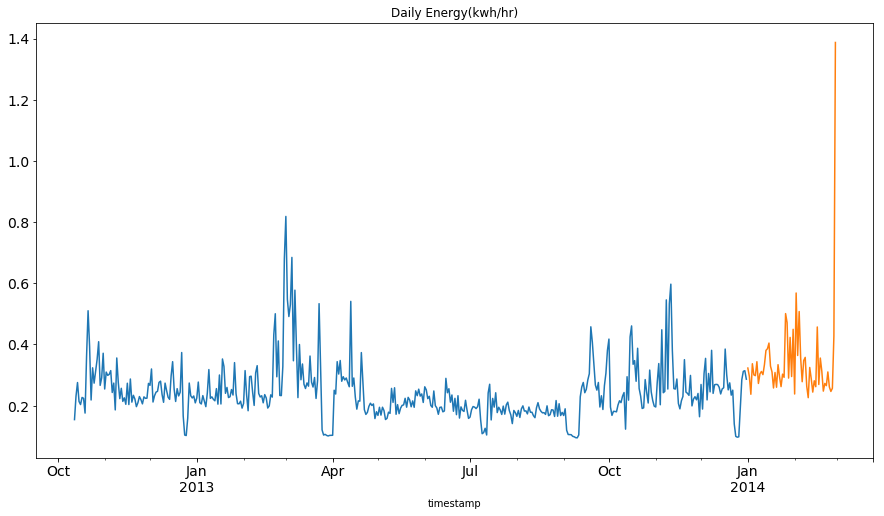

In [11]:
train = train.resample('D').mean()
test = test.resample('D').mean()

train.energy.plot(figsize=(15,8), title= 'Daily Energy(kwh/hr)', fontsize=14)
test.energy.plot(figsize=(15,8), title= 'Daily Energy(kwh/hr)', fontsize=14)
plt.show()



In [17]:
train.to_csv('C:/Users/iqbalzai/Documents/ds/dataset002.csv')

Potential Experiments

- structure of the network (number of layers, neurons per layer)

- different features sets

- different aggregation levels -> (manual aggregates)

- different regions


# 01. Experiment 

# Naive Forecast -  Just simply predicting the next day value and checking the RMSE

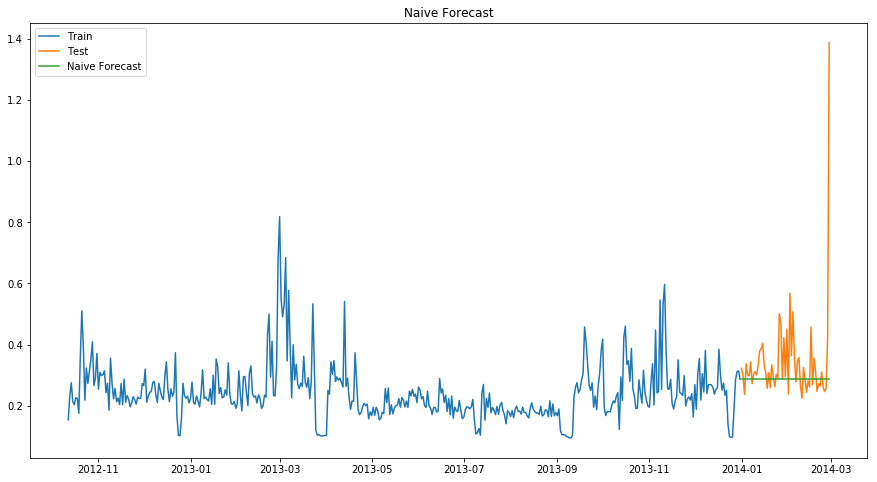

In [14]:

dd= np.asarray(train.energy)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]

plt.figure(figsize=(15,8))
plt.plot(train.index, train['energy'], label='Train')
plt.plot(test.index,test['energy'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.energy, y_hat.naive))
print('Test MSE: %.3f' % rms)


Test MSE: 0.165


# 02. Moving Average

In this experiment we take the single MAC0002 and predict its energy output (kwh/hr) for the months of Jan and Feb 2014. 


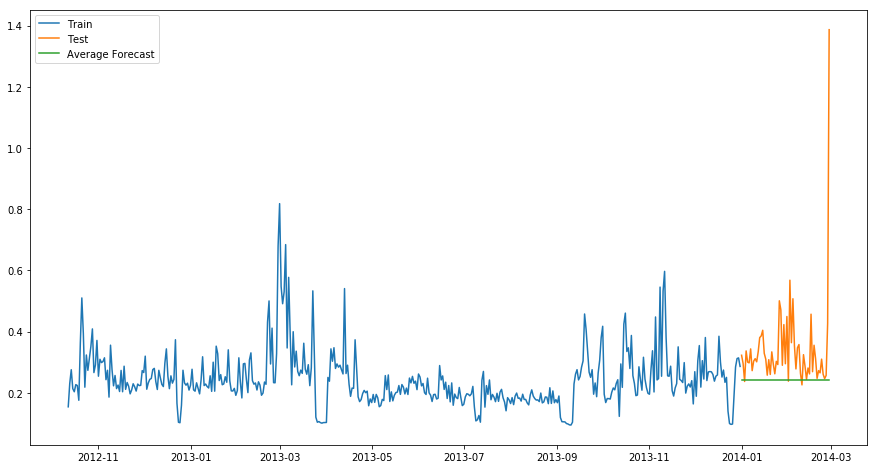

In [17]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['energy'].mean()
plt.figure(figsize=(15,8))
plt.plot(train['energy'], label='Train')
plt.plot(test['energy'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [18]:
rms = sqrt(mean_squared_error(test.energy, y_hat_avg.avg_forecast))
print('Test RMSE: %.3f' % rms)

Test RMSE: 0.184


# 03.  Exponential Smoothing 

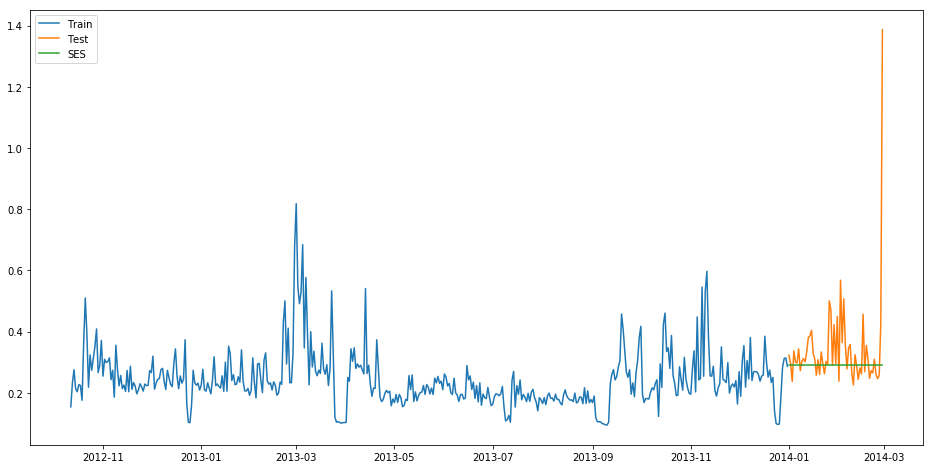

In [19]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['energy'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['energy'], label='Train')
plt.plot(test['energy'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()


In [21]:
rms = sqrt(mean_squared_error(test.energy, y_hat_avg.SES))
print('Test RMSE: %.3f' % rms)

Test RMSE: 0.163


# Time Series - Stationarity

Each Time series dataset can be decomposed into it’s componenets which are Trend, Seasonality and Residual. Any dataset that follows a trend can use Holt’s linear trend method for forecasting.

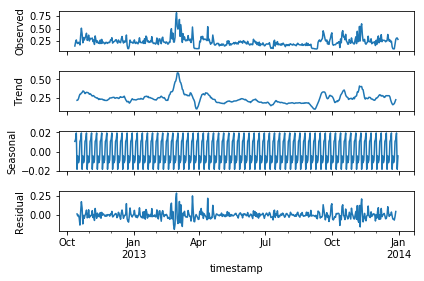

In [80]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.energy).plot()
result = sm.tsa.stattools.adfuller(train.energy)
#plt.figure(figsize=(16,8)
plt.show()


# 04. Holt's Linear model from statsmodels 

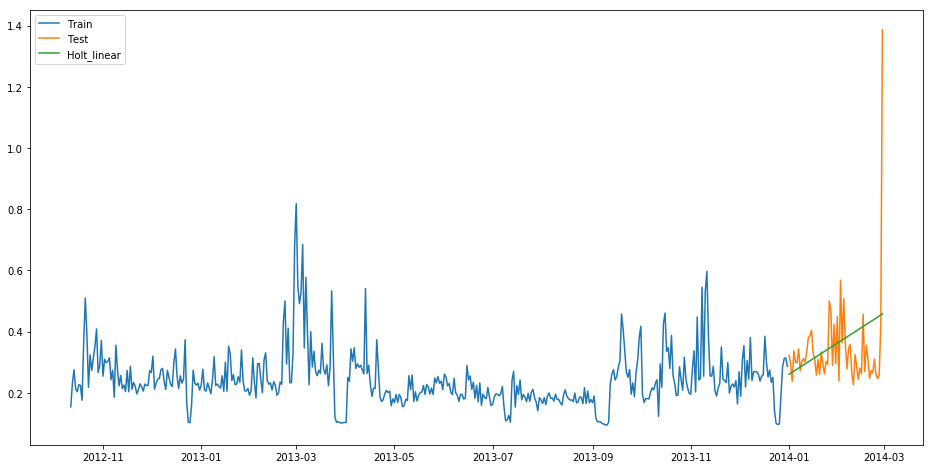

In [13]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['energy'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['energy'], label='Train')
plt.plot(test['energy'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

# 05. SARIMA model


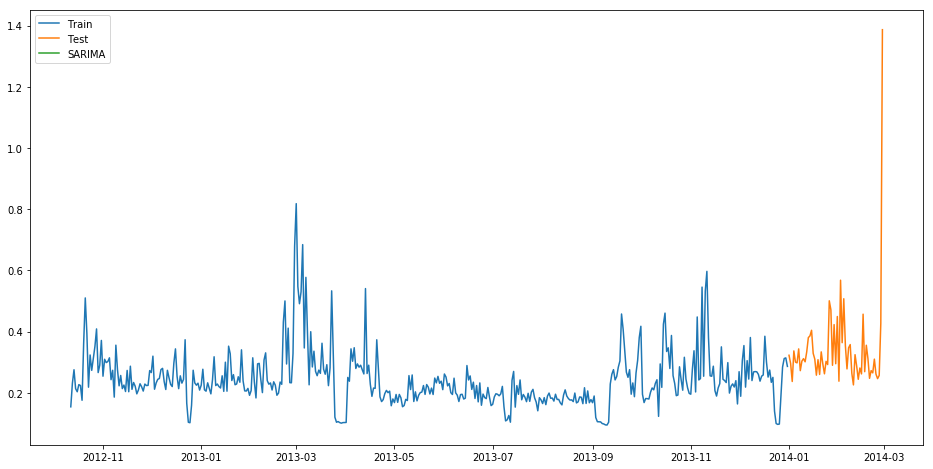

In [81]:
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.energy, order=(0, 1, 0),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2012-12-10", end="2013-12-31", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train['energy'], label='Train')
plt.plot(test['energy'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [97]:
rms = sqrt(mean_squared_error(test.energy, y_hat_avg.SARIMA))
print(rms)

NameError: name 'sqrt' is not defined

# Grid Search Method for pdq

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from itertools import product #, then change itertools.product into simply product. 
import sys #from scipy.optimize import leastsq


# define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)
 
# generate all different combinations of p, d and q triplets
pdq = list(product(p, d, q))
 
# generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(product(p, d, q))]




In [49]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
tmp_model = None
best_mdl = None
 
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            tmp_mdl = sm.tsa.statespace.SARIMAX(train,
                                                order = param,
                                                seasonal_order = param_seasonal,
                                                enforce_stationarity=True,
                                                enforce_invertibility=True)
            res = tmp_mdl.fit()
            if res.aic < best_aic:
                best_aic = res.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
                best_mdl = tmp_mdl
        except:
            print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))


Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 

Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 

Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 'ValueError'>
Unexpected error: <class 

In [32]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
 
series = pd.read_csv('C:/Users/iqbalzai/Documents/ds/dataset002.csv')
   
X = series.energy
X = X.astype('float32')

# create a differe
def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return Series(diff)
 
series = pd.read_csv('C:/Users/iqbalzai/Documents/ds/dataset002.csv')
X = series.energy
# difference data
stationary = difference(X)
stationary.index = series.index[1:]
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
#save
stationary.to_csv('C:/Users/iqbalzai/Documents/ds/stationary002.csv')

ADF Statistic: -9.524469
p-value: 0.000000
Critical Values:
	1%: -3.445
	5%: -2.868
	10%: -2.570


In [77]:
train.head()

,year,energy
timestamp,,
2012-10-12,2012,0.154304
2012-10-13,2012,0.230979
2012-10-14,2012,0.275479
2012-10-15,2012,0.213688
2012-10-16,2012,0.203521


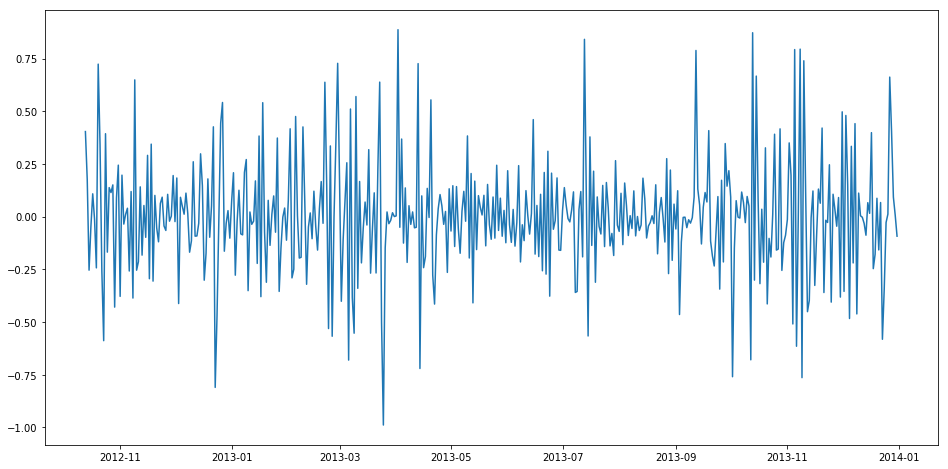

In [40]:
training = np.log(train)
training_diff = training.diff(periods=1).energy[1:]
plt.figure(figsize=(16,8))
plt.plot(training_diff)


##### We see here that there is no more a multiplicative affect and no more trend. However, an unstable seasonal pattern is still present in this residual series. It indicates that we need to remove the seasonal pattern which can be done with SARIMA. We can select the seasonal pattern parameters of SARIMA by looking at the ACF and PACF plots.


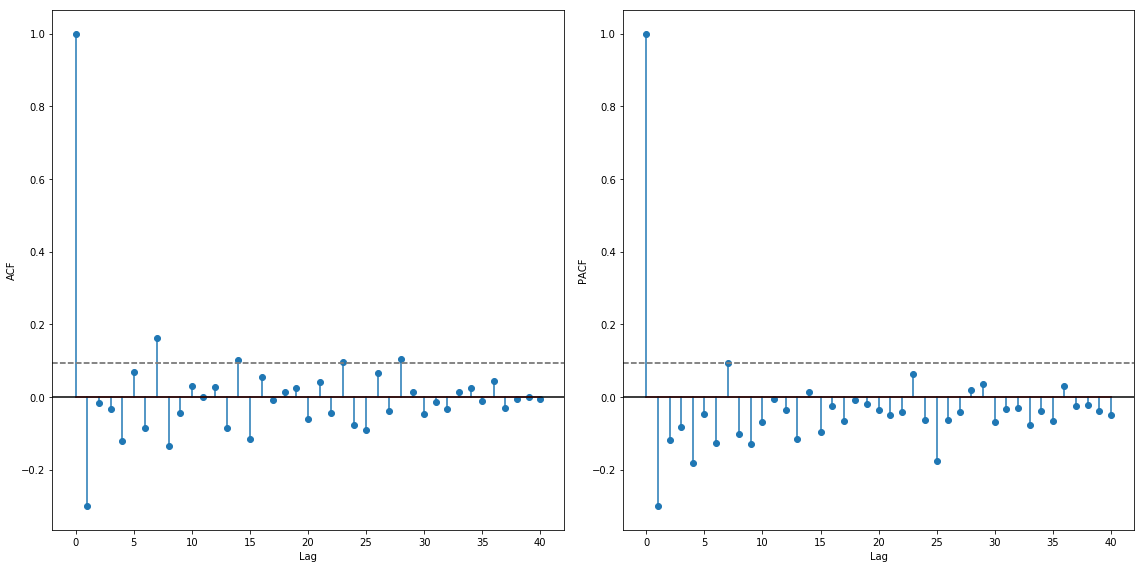

In [43]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(training_diff, nlags=40)
lag_pacf = pacf(training_diff, nlags=40,method='ols')

plt.figure(figsize=(16,8))
plt.subplot(121)
plt.stem(lag_acf)

plt.axhline(y=0,linestyle='-',color='black')
plt.axhline(y=1.96/np.sqrt(len(training)), color='grey',linestyle ='--')
plt.axhline(y=1.96/np.sqrt(len(training)), color='grey',linestyle ='--')
plt.xlabel('Lag')
plt.ylabel('ACF')


from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(training_diff, nlags=40)
lag_pacf = pacf(training_diff, nlags=40,method='ols')

#plt.figure(figsize=(16,8))
plt.subplot(122)
plt.stem(lag_pacf)

plt.axhline(y=0,linestyle='-',color='black')
plt.axhline(y=1.96/np.sqrt(len(training)), color='grey',linestyle ='--')
plt.axhline(y=1.96/np.sqrt(len(training)), color='grey',linestyle ='--')
plt.xlabel('Lag')
plt.ylabel('PACF')

plt.tight_layout()

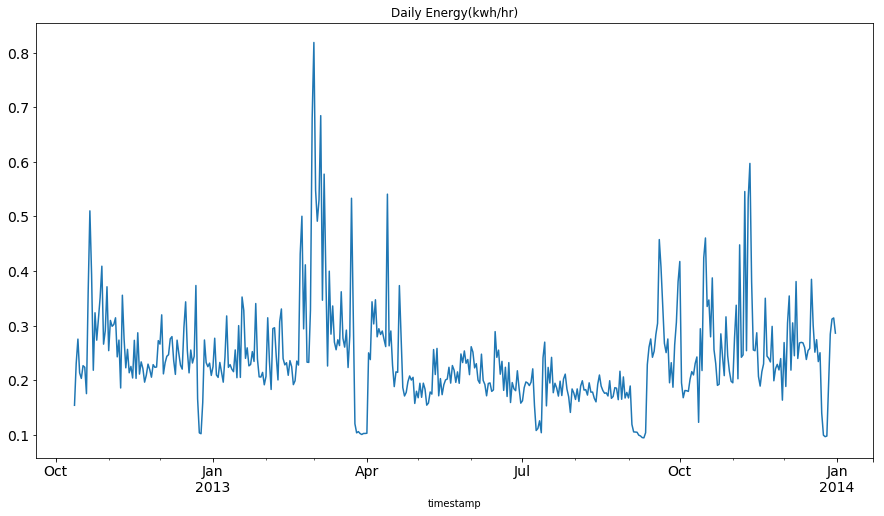

In [104]:
train.head()
train.drop(['year'],axis=1)

#plt.plot(train,'b');
train.energy.plot(figsize=(15,8), title= 'Daily Energy(kwh/hr)', fontsize=14)

In [114]:
testing.head()
testing.drop(['year'],axis=1)

,energy
timestamp,
2014-01-01,-1.130619
2014-01-02,-1.218311
2014-01-03,-1.439168
2014-01-04,-1.087672
2014-01-05,-1.202724
2014-01-06,-1.210802
2014-01-07,-1.068326
2014-01-08,-1.300193
2014-01-09,-1.191756


C:\Users\iqbalzai\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\iqbalzai\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\pandas\core\indexes\base.py:3756: RuntimeWarning: Cannot compare type 'Timestamp' with type 'str', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


TypeError: unsupported operand type(s) for +: 'Timestamp' and 'Timestamp'

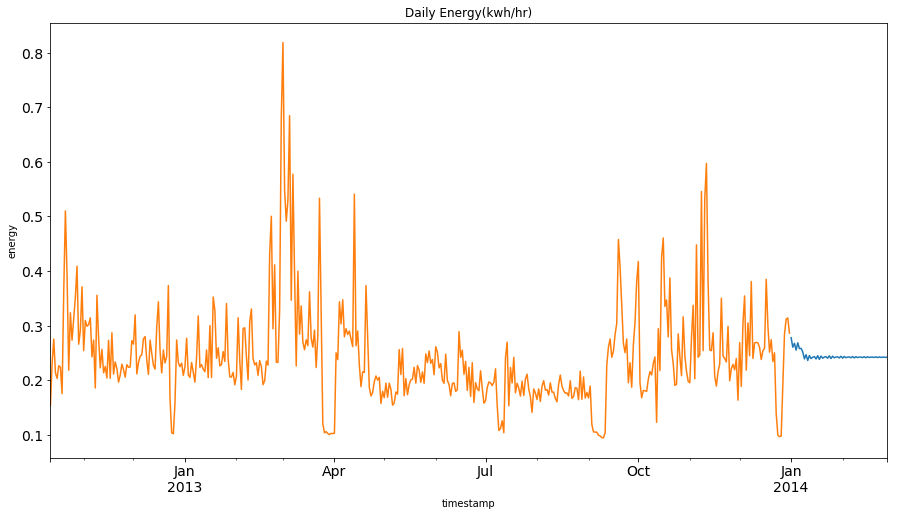

In [115]:
#mport pandas as pd
#import numpy as np
#import matplotlib.pylab as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(training, order=(4,1,4), seasonal_order=(1,0,0,12), enforce_stationarity=False,enforce_invertibility=False)
model_fit = model.fit(disp=False)

testing = np.log(test)

K = len(testing)
forecast = model_fit.forecast(K)

forecast = np.exp(forecast) #convert back to real value (exp)

#plt.figure
#plt.figure(figsize=(16,8))
#plt.plot(forecast,'r');
forecast.plot(figsize=(15,8), title= 'Daily Energy(kwh/hr)', fontsize=14)
train.energy.plot(figsize=(15,8), title= 'Daily Energy(kwh/hr)', fontsize=14)
#plt.plot(train,'b');
plt.ylabel("energy");
plt.autoscale(enable=True,axis='x',tight=True)
#plt.title('RMSE:%.2f'% np.sqrt(sum((forecast-testing)**2)/len(testing)));

In [109]:
forecast.head()
forecast.columns = ["timestamp", "energy"]
forecast.head()

2014-01-01    0.278077
2014-01-02    0.260584
2014-01-03    0.267819
2014-01-04    0.255356
2014-01-05    0.268711
Freq: D, dtype: float64

###### An ARIMA model consists of coordinates (p, d, q):

--p stands for the number of autoregressive terms, i.e. the number of observations from past time values used to forecast future values. e.g. if the value of p is 2, then this means that two previous time observations in the series are being used to forecast the future trend.

--d denotes the number of differences needed to make the time series stationary (i.e. one with a constant mean, variance, and autocorrelation). For instance, if d = 1, then it means that a first-difference of the series must be obtained to transform it into a stationary one.

--q represents the moving average of the previous forecast errors in our model, or the lagged values of the error term. As an example, if q has a value of 1, then this means that we have one lagged value of the error term in the model.


Using TensorFlow backend.


ImportError: Traceback (most recent call last):
  File "C:\Users\iqbalzai\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\Users\iqbalzai\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\Users\iqbalzai\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\Users\iqbalzai\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\imp.py", line 243, in load_module
    return load_dynamic(name, filename, file)
  File "C:\Users\iqbalzai\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\imp.py", line 343, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: The specified module could not be found.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/install_sources#common_installation_problems

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.